In [19]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 

# Data

In [3]:
movies = np.array([[3,104],[2,100], [101,10], [99,5], [98,2], [1,81]])
labels = np.array(['R', 'R', 'A', 'A', 'A', 'R'])

# Đồ thị

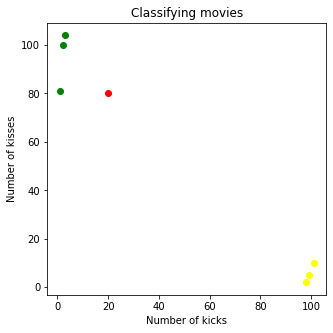

In [4]:
unknown_movie = [20,80]

fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(111)

for i in range(len(movies)):
    color = 'green' if labels[i] == 'R' else 'yellow'
    axes.scatter(movies[i][0], movies[i][1], c=color)
    
axes.scatter(unknown_movie[0], unknown_movie[1], c='red')
axes.set_xlabel('Number of kicks')
axes.set_ylabel('Number of kisses')
axes.set_title("Classifying movies")
plt.show()

# Train và Dự đoán

In [6]:

knn5 = neighbors.KNeighborsClassifier(4)
knn5.fit(movies, labels)

labels_pred = knn5.predict([unknown_movie])
print(labels_pred)

['R']


# Demo 2

## Import thu vien

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
import pandas as pd 

### 1 Read Data

In [31]:
df = pd.read_csv('data_iris.csv')
pd.DataFrame(df)



,sepallength,sepalwidth,petallength,petalwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
for i in df.index:
    print(df.index[i],df.name[i])

0 Iris-setosa
1 Iris-setosa
2 Iris-setosa
3 Iris-setosa
4 Iris-setosa
5 Iris-setosa
6 Iris-setosa
7 Iris-setosa
8 Iris-setosa
9 Iris-setosa
10 Iris-setosa
11 Iris-setosa
12 Iris-setosa
13 Iris-setosa
14 Iris-setosa
15 Iris-setosa
16 Iris-setosa
17 Iris-setosa
18 Iris-setosa
19 Iris-setosa
20 Iris-setosa
21 Iris-setosa
22 Iris-setosa
23 Iris-setosa
24 Iris-setosa
25 Iris-setosa
26 Iris-setosa
27 Iris-setosa
28 Iris-setosa
29 Iris-setosa
30 Iris-setosa
31 Iris-setosa
32 Iris-setosa
33 Iris-setosa
34 Iris-setosa
35 Iris-setosa
36 Iris-setosa
37 Iris-setosa
38 Iris-setosa
39 Iris-setosa
40 Iris-setosa
41 Iris-setosa
42 Iris-setosa
43 Iris-setosa
44 Iris-setosa
45 Iris-setosa
46 Iris-setosa
47 Iris-setosa
48 Iris-setosa
49 Iris-setosa
50 Iris-versicolor
51 Iris-versicolor
52 Iris-versicolor
53 Iris-versicolor
54 Iris-versicolor
55 Iris-versicolor
56 Iris-versicolor
57 Iris-versicolor
58 Iris-versicolor
59 Iris-versicolor
60 Iris-versicolor
61 Iris-versicolor
62 Iris-versicolor
63 Iris-versi

In [41]:
print(df.shape)
df.head(5)
df.tail(3)

(150, 5)


,sepallength,sepalwidth,petallength,petalwidth,name
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
X = df.drop(columns=['name'])
Y = df['name']

## 3 Knn train and test

In [57]:
X_train , X_test , Y_train , Y_test= ms.train_test_split(X, Y, test_size= 0.1 , random_state=123)

In [58]:
### goi ham va train 
knn5 = KNeighborsClassifier(n_neighbors=15)
knn5.fit(X_train, Y_train)



KNeighborsClassifier(n_neighbors=15)

In [59]:
### ra ket qua la gi va so sanh 
Y_pred = knn5.predict(X_test)
for i in range(0,Y_test.size):
    if Y_test.iloc[i] != Y_pred[i]:
        print(Y_test.index[i],Y_test.iloc[i],Y_pred[i],'---False')
    else:
        print(Y_test.index[i],Y_test.iloc[i],Y_pred[i])


72 Iris-versicolor Iris-versicolor
112 Iris-virginica Iris-virginica
132 Iris-virginica Iris-virginica
88 Iris-versicolor Iris-versicolor
37 Iris-setosa Iris-setosa
138 Iris-virginica Iris-virginica
87 Iris-versicolor Iris-versicolor
42 Iris-setosa Iris-setosa
8 Iris-setosa Iris-setosa
90 Iris-versicolor Iris-versicolor
141 Iris-virginica Iris-virginica
33 Iris-setosa Iris-setosa
59 Iris-versicolor Iris-versicolor
116 Iris-virginica Iris-virginica
135 Iris-virginica Iris-virginica


In [60]:
### Tinh do chinh xac 
print(metrics.confusion_matrix(Y_test,Y_pred))
print('---------------')
print("Do chinh xac :" + str(np.round(metrics.accuracy_score(Y_test,Y_pred),4)))

[[4 0 0]
 [0 5 0]
 [0 0 6]]
---------------
Do chinh xac :1.0


### 4. Manual Tuning

In [62]:
accs = []
k_grid = range(1,50,1)
for k in k_grid:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred)
    accs.append(score)
    if score == 1: print('Accuracy 100% with k =', k)

Accuracy 100% with k = 15
Accuracy 100% with k = 19
Accuracy 100% with k = 20
Accuracy 100% with k = 23
Accuracy 100% with k = 27
